## Stock market forecasting using Time Series analysis
**This notebook is inspired by Nagesh Singh Chauhan. We use a machine learning technique to forecast stocks. We will   know how to build an ARIMA model for stock price forecasting**.

“The stock market is designed to transfer money from the active to the patient.” ― Warren Buffett

 

**The stock market** is a market that enables the seamless exchange of buying and selling of company stocks. 

Every Stock Exchange has its own Stock Index value. The index is the average value that is calculated by combining several stocks. This helps in representing the entire stock market and predicting the market’s movement over time. The stock market can have a huge impact on people and the country’s economy as a whole. Therefore, predicting the stock trends in an efficient manner can minimize the risk of loss and maximize profit.

* The stock market enables buyers and sellers to negotiate prices and make trades.
* The stock market works through a network of exchanges.

Companies list shares of their stock on an exchange through a process called an **initial public offering or IPO**. Investors purchase those shares, which allows the company to raise money to grow its business. Investors can then buy and sell these stocks among themselves, and the exchange tracks the supply and demand of each listed stock.
That supply and demand help determine the price for each security or the levels at which stock market participants — investors and traders — are willing to buy or sell.

If an investor wants to sell shares of a stock, they tell their broker what stock to sell, how many shares, and at what price level. That process is called an “offer” or “ask price.”

Predicting how the stock market will perform is one of the most difficult things to do. There are so many factors involved in the prediction. All these aspects combine to make share prices volatile and very difficult to predict with a high degree of accuracy.

Since it is essential to identify a model to analyze trends of stock prices with adequate information for decision making, it recommends that transforming the time series using **ARIMA** is a better  approach than forecasting directly, as it gives more authentic and reliable results.

Autoregressive Integrated Moving Average (ARIMA) Model converts **non-stationary data to stationary data before working on it**. It is one of the most popular models to predict linear time series data.
ARIMA model has been used extensively in the field of finance and economics as it is known to be robust, efficient and has a strong potential for short-term share market prediction.

## Implementing stock price forecasting

The dataset consists of stock market data of Altaba Inc.
The data shows the stock price of Altaba Inc from 1996–04–12 till 2017–11–10. The goal is to train an ARIMA model with optimal parameters that will forecast the closing price of the stocks on the test data.

## 1. So let's start with loading all the required libraries:

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

## 2. Load the dataset

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('aaba.us.txt',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

In [3]:
data.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1996-04-12,1.05,1.79,1.02,1.38,408720000,0
1996-04-15,1.49,1.50,1.25,1.34,79231200,0
1996-04-16,1.34,1.34,1.17,1.20,48026400,0
1996-04-17,1.18,1.18,1.03,1.12,42871200,0
1996-04-18,1.25,1.25,1.17,1.22,27352800,0


## 3. Visualize the per day closing price of the stock.

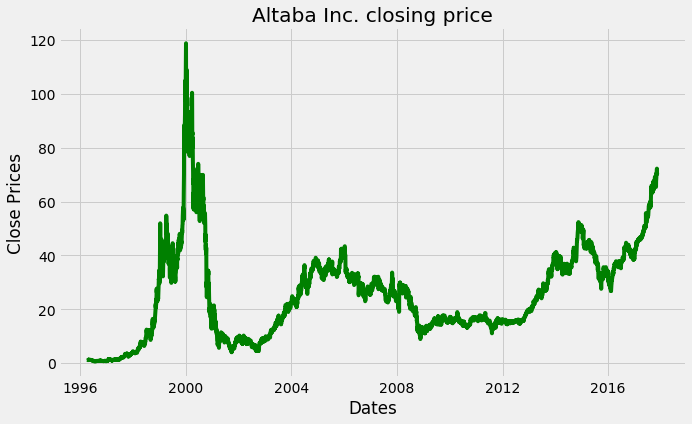

In [4]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'], c='green')
plt.title('Altaba Inc. closing price')
plt.show()

## 4. Lets us plot the scatterplot:

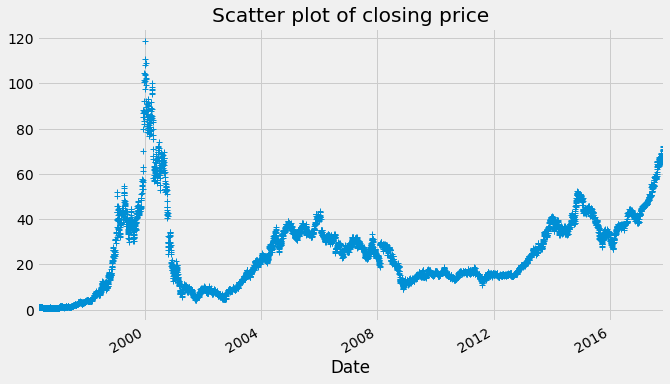

In [5]:
#scatter plot of the sales
df_close = data['Close']
df_close.plot(style='+')
plt.title('Scatter plot of closing price')
plt.show()


## Let's visualize the data in our series through a probability distribution too

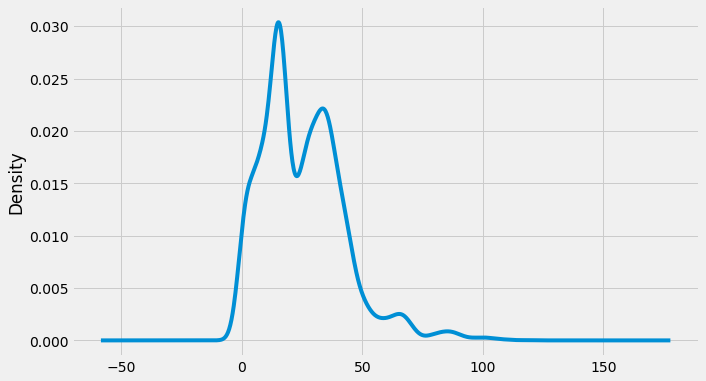

In [6]:
#Distribution of the dataset
df_close.plot(kind='kde')


### We can observe a near-normal distribution(bell-curve) over sales values.


#### So, we need to check if a series is stationary or not because time series analysis only works with stationary data.

**The Dickey-Fuller test** is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

* Null Hypothesis: The series has a unit root (value of a =1)
* Alternate Hypothesis: The series has no unit root.
If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

### So let's check for stationarity:

In [7]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

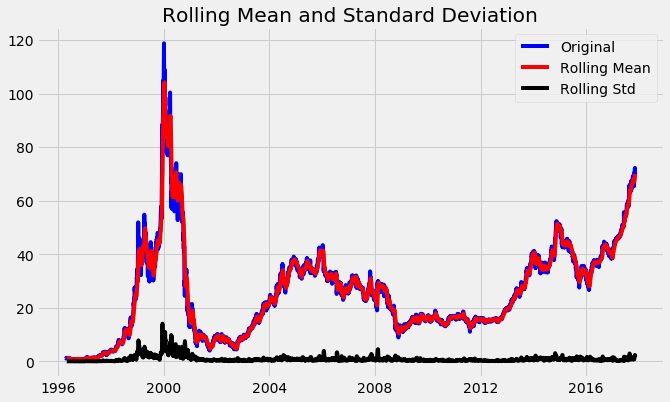

Results of dickey fuller test
Test Statistics                  -2.062280
p-value                           0.259950
No. of lags used                 32.000000
Number of observations used    5401.000000
critical value (1%)              -3.431561
critical value (5%)              -2.862075
critical value (10%)             -2.567055
dtype: float64


In [8]:
test_stationarity(df_close)

Through the above graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

## So let's separate Trend and Seasonality from the time series.

<Figure size 720x432 with 0 Axes>

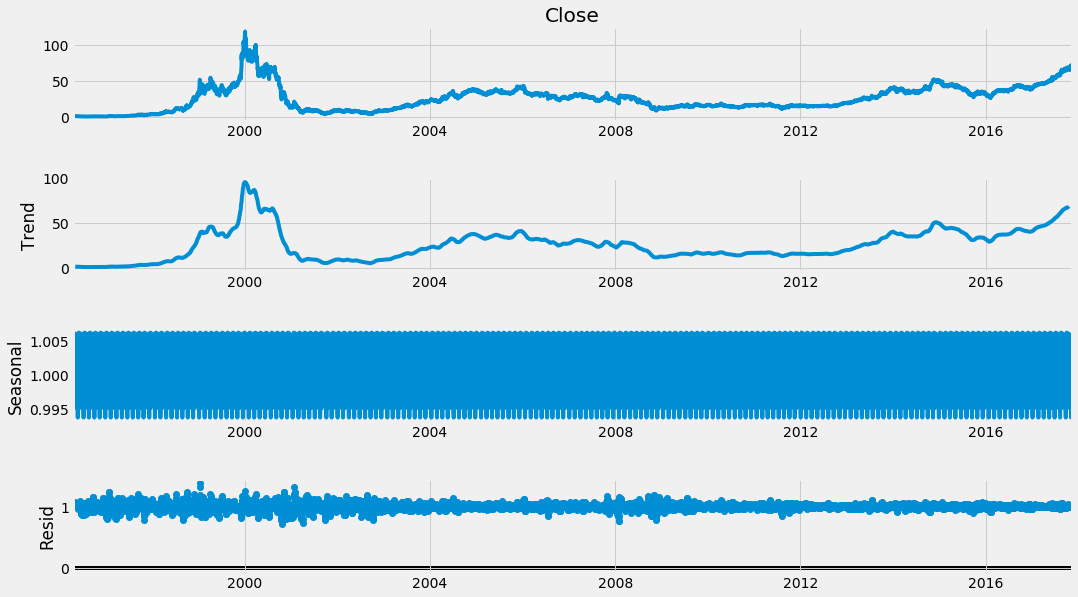

In [9]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

We start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

No handles with labels found to put in legend.


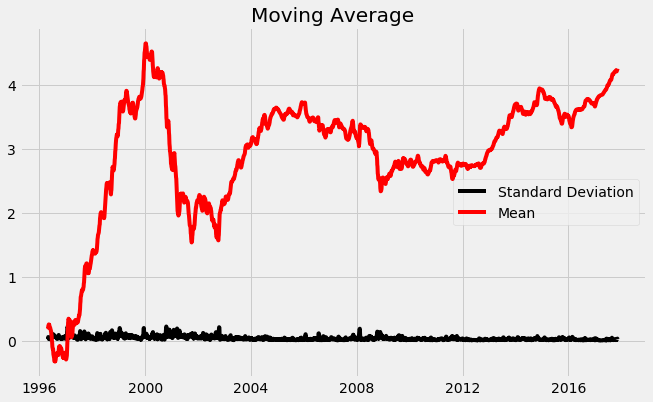

In [10]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

We want to create an ARIMA model and will train it with the closing price of the stock on the train data.
So let's start by splitting the data into training and test set and visualize it.

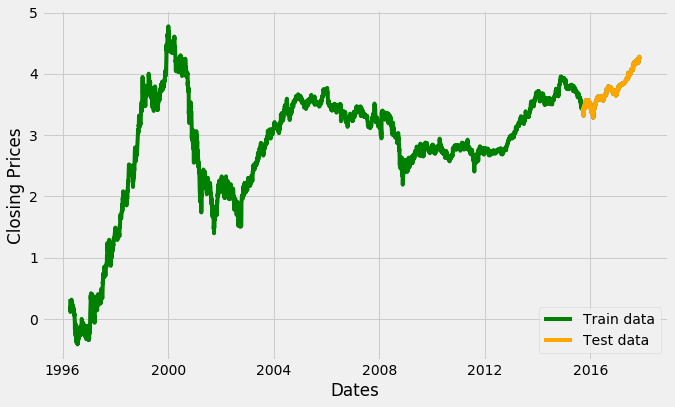

In [11]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'orange', label='Test data')
plt.legend()

So it time to choose parameters *p,q,d* for ARIMA model. We are going to use Auto ARIMA to get the best parameters.

**Auto ARIMA**: Automatically discover the optimal order for an ARIMA model.

The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. 

In [26]:
# model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
#                       test='adf',       # use adftest to find             optimal 'd'
#                       max_p=3, max_q=3, # maximum p and q
#                       m=1,              # frequency of series
#                       d=None,           # let model determine 'd'
#                       seasonal=False,   # No Seasonality
#                       start_P=0, 
#                       D=0, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)
# print(model_autoARIMA.summary())
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-18377.184, BIC=-18364.196, Time=0.462 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-18375.274, BIC=-18355.791, Time=1.139 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-18375.280, BIC=-18355.798, Time=0.736 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-18377.513, BIC=-18371.019, Time=0.101 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-18378.090, BIC=-18352.114, Time=0.828 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=-18386.172, BIC=-18353.702, Time=1.020 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=-18386.124, BIC=-18360.147, Time=0.376 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=-18384.395, BIC=-18345.431, Time=2.501 seconds
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=-18384.593, BIC=-18345.628, Time=1.024 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=-18386.043, BIC=-18353.573, Time=1.083 seco

So the Auto ARIMA model provided the value of p,d, and q as 3,1 and 0 respectively.

Before moving forward, let’s review the residual plots from auto ARIMA.

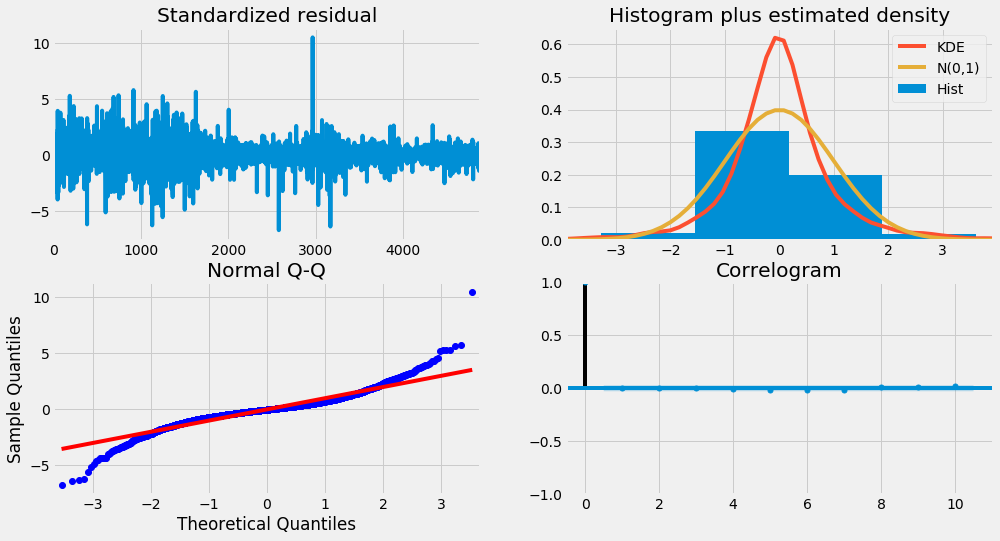

In [14]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

So how to interpret the plot diagnostics?

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s start forecasting the stock prices.

Next, create an ARIMA model with provided optimal parameters p, d and q.

In [27]:
model = ARIMA(train_data, order=(3, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4886
Model:                 ARIMA(3, 1, 0)   Log Likelihood                9198.196
Method:                       css-mle   S.D. of innovations              0.037
Date:                Mon, 15 Jun 2020   AIC                         -18386.391
Time:                        11:44:10   BIC                         -18353.920
Sample:                             1   HQIC                        -18374.997
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0007      0.001      1.325      0.185      -0.000       0.002
ar.L1.D.Close     0.0056      0.014      0.392      0.695      -0.022       0.034
ar.L2.D.Close    -0.0514      0.014     

/home/aims/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aims/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### 3. Let's  forecast the stock prices on the test dataset keeping 95% confidence level.

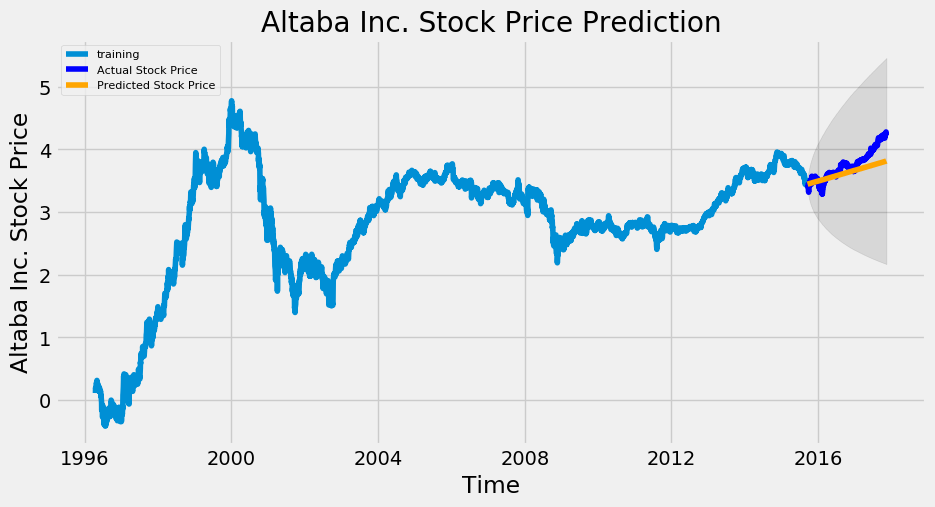

In [28]:
# Forecast
fc, se, conf = fitted.forecast(544, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Altaba Inc. Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


### As you can see our model did quite handsomely. Let us also check the commonly used accuracy metrics to judge forecast results:

In [29]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


MSE: 0.03348688840782049
MAE: 0.13853206888948405
RMSE: 0.18299423053151292
MAPE: 0.03546286497297845


### Around 3.5% MAPE(Mean Absolute Percentage Error) implies the model is about 96.5% accurate in predicting the test set observations.

## Thanks to @nageshsinghc4, your bloc was very helpful to me.
